In [ ]:
'''
Questo script esegue una ulteriore validazione del modello
Utilizzando un test-dataset esterno
'''

In [1]:
# Import delle librerie
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.models import resnet50
from torchvision.datasets import ImageFolder

import glob
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import funzioni da file utils.txt
import ipynb
from ipynb.fs.full.utils import get_test_preds

In [3]:
# Definizione trasformazioni da applicare al batch di immagini
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transforms = T.Compose([
        T.Resize((128,128)),
        T.ToTensor(),
        T.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        ),
])

In [4]:
# Definizione del dataset, della loss function e dell'archittettura della rete
test_data_path  = '/media/users/cgambina/Progetto_6/Dati/Immagini_Test'
tot_faces = len(glob.glob(test_data_path + '/*/*.png'))

test_dataset = ImageFolder(test_data_path, transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
criterion = nn.BCEWithLogitsLoss() 

WGTS_PATH = '/media/users/cgambina/Progetto_6/Dati/BestWeights/best_model.pt'
net = resnet50().to(device)
n_filters = net.fc.in_features
net.fc = nn.Linear(n_filters, 1).to(device)

# Caricamento pesi ottenuti sul training-dataset
net.load_state_dict(torch.load(WGTS_PATH))

<All keys matched successfully>

In [5]:
# Calcolo di loss e accuracy sul test-dataset
test_loss, test_acc, preds, labels= get_test_preds(net, device, test_loader, criterion)
test_loss /= tot_faces
test_acc /= tot_faces

print(f'Loss: {round(test_loss,4)}  Accuracy: {round(test_acc * 100,2)}%')

Loss: 0.242  Accuracy: 96.49%


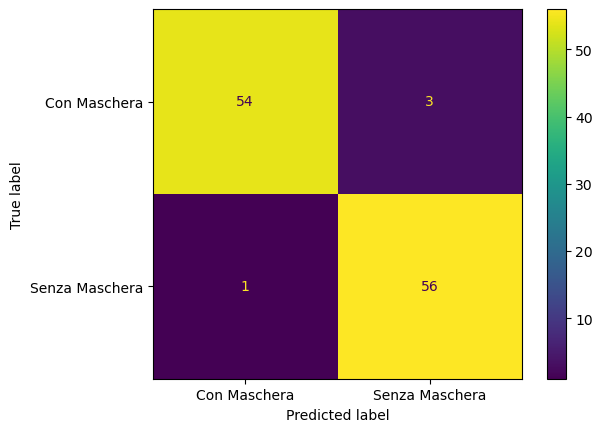

In [6]:
# Confusion Matrix
labels_map = ['Con Maschera', 'Senza Maschera']

conf_mtx = confusion_matrix(labels, preds)
ConfusionMatrixDisplay(confusion_matrix=conf_mtx, display_labels=labels_map).plot()